# **Dataset's**

In [1]:
!git clone https://github.com/Meghana3015/ML-Dataset.git
!mkdir -p datasets
!mv ML-Dataset/* datasets/
!rm -rf ML-Dataset
!ls datasets
!mv /content/datasets/ML\ Lab\ Exercise\ 9\ Dataset /content/datasets/data

Cloning into 'ML-Dataset'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 27.81 KiB | 5.56 MiB/s, done.
'co2_emission_train - Regression.csv'   Product_Data.csv
'ML Lab Exercise 9 Dataset'	        weather_data.csv


# **DB Connect**

In [2]:
 import sqlite3
 import pandas as pd
 # Load the CSV file into a pandas DataFrame
 csv_file_path = '/content/datasets/co2_emission_train - Regression.csv'
 data = pd.read_csv(csv_file_path)
 # Connect to the SQLite database (or create it if it doesn't exist)
 db_path = 'co2-emission-data.db'
 conn = sqlite3.connect(db_path)
 cursor = conn.cursor()
 # Create the table
 cursor.execute('''
 CREATE TABLE IF NOT EXISTS co2_emission_data (
 Engine_Size_liters REAL,
 Cylinders_count INTEGER,
 Fuel_Consumption_liters_per_100km REAL,
 Vehicle_Weight_kg INTEGER,
 Horsepower_hp INTEGER,
 Age_years INTEGER,
 CO2_Emissions_g_per_km REAL
 )
 ''')
 for index, row in data.iterrows():
     cursor.execute('''
     INSERT INTO co2_emission_data (
     Engine_Size_liters,
     Cylinders_count,
     Fuel_Consumption_liters_per_100km,
     Vehicle_Weight_kg,
     Horsepower_hp,
     Age_years,
     CO2_Emissions_g_per_km
     ) VALUES (?, ?, ?, ?, ?, ?, ?)
     ''', (row['Engine_Size (liters)'], # Use actual column name
row['Cylinders (count)'],
 # Use actual column name
 row['Fuel_Consumption (liters/100km)'], # Use actual column name
 row['Vehicle_Weight (kg)'], # Use actual column name
 row['Horsepower (hp)'],
 row['Age (years)'],
 # Use actual column name
 # Use actual column name
 row['CO2_Emissions (g/km)'])) # Use actual column name
 # Commit the transaction and close the connection
 conn.commit()
 conn.close()
 print(f"Data from {csv_file_path} has been successfully inserted into {db_path}.")

Data from /content/datasets/co2_emission_train - Regression.csv has been successfully inserted into co2-emission-data.db.


In [3]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
db_path = 'co2-emission-data.db'
conn = sqlite3.connect(db_path)
query = "SELECT * FROM co2_emission_data"
df = pd.read_sql_query(query, conn)
conn.close()
csv_file_path = 'extracted_data.csv'
df.to_csv(csv_file_path, index=False)
df_csv = pd.read_csv(csv_file_path)
print("First 5 rows of data from CSV file")
print(df_csv.head(5))
train_data, test_data = train_test_split(df_csv, test_size=0.2)
print("Training data")
print(train_data.head(5))
print("Testing data")
print(test_data.head(5))

First 5 rows of data from CSV file
   Engine_Size_liters  Cylinders_count  Fuel_Consumption_liters_per_100km  \
0                 4.0                3                               16.0   
1                 5.0               11                               14.0   
2                 3.0                9                               20.0   
3                 5.0               11                               10.0   
4                 5.0               10                               20.0   

   Vehicle_Weight_kg  Horsepower_hp  Age_years  CO2_Emissions_g_per_km  
0               2445            197          3                  412.95  
1               1103             87         12                  444.85  
2               2875            350         16                  543.75  
3               1253            292         19                  410.85  
4               2250            123          5                  550.80  
Training data
    Engine_Size_liters  Cylinders_count  Fuel_Cons

# **Linear Regression**

In [4]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Load the dataset from a CSV file
data = pd.read_csv("/content/datasets/Product_Data.csv")
# Separate the features (X) and target (y)
X = data[['Product Price (INR)', 'Product Quality (1 to 10)', 'Discount (%)','Store Visibility (1 to 10)', 'Seasonality (1 for seasonal, 0 for not)']]
y = data['Sales (INR)']
# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Initialize the Linear Regression model
model = LinearRegression()
# Perform 10-fold cross-validation using R² score
cv_scores_r2 = cross_val_score(model, X_scaled, y, cv=10, scoring='r2')
# Perform 10-fold cross-validation using MSE (negative MSE because cross_val_score minimizes it)
cv_scores_mse = cross_val_score(model, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
# Calculate mean cross-validation R² and MSE
mean_cv_r2 = cv_scores_r2.mean()
mean_cv_mse =-cv_scores_mse.mean() # Negate MSE to get positive values
# Output performance metrics
print(f"Mean Cross-Validation R² (10-Fold): {mean_cv_r2}")
print(f"Mean Cross-Validation MSE (10-Fold): {mean_cv_mse}")
# Function to prompt user input and predict sales
def predict_sales(model, scaler):
    try:
        # Collect user inputs for each feature
        product_price = float(input("Enter the product price in INR: "))
        product_quality = int(input("Enter the product quality (1 to 10): "))
        discount = int(input("Enter the discount percentage (0 to 50): "))
        store_visibility = int(input("Enter the store visibility (1 to 10): "))
        seasonality = int(input("Is the product seasonal? (1 for Yes, 0 for No):"))
        # Create a DataFrame for the input data
        user_input = pd.DataFrame({
            'Product Price (INR)': [product_price],
            'Product Quality (1 to 10)': [product_quality],
            'Discount (%)': [discount],
            'Store Visibility (1 to 10)': [store_visibility],
            'Seasonality (1 for seasonal, 0 for not)': [seasonality]
        })
        # Standardize the input data using the same scaler used for training
        user_input_scaled = scaler.transform(user_input)
# Train the model on the entire dataset before making predictions
        model.fit(X_scaled, y)
# Predict sales
        predicted_sales = model.predict(user_input_scaled)[0]
# Print the predicted sales
        print(f"Predicted Sales (INR): {predicted_sales:.2f}")
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter the correct values.")
# Call the function to prompt
predict_sales(model, scaler)

Mean Cross-Validation R² (10-Fold): 0.9925374520121467
Mean Cross-Validation MSE (10-Fold): 86290.65526550889
Enter the product price in INR: 1000
Enter the product quality (1 to 10): 9
Enter the discount percentage (0 to 50): 25
Enter the store visibility (1 to 10): 9
Is the product seasonal? (1 for Yes, 0 for No):1
Predicted Sales (INR): 17449.30


# **KNN**

In [6]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
 # Load the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target # Labels
# Create the k-NN model (with k=5)
knn = KNeighborsClassifier(n_neighbors=5)
# Perform cross-validation and make predictions on all folds
y_pred = cross_val_predict(knn, X, y, cv=10) # 10-fold cross-validation
# Evaluate model using accuracy score and confusion matrix
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
# Print accuracy and confusion matrix
print(f"Cross-Validation Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
correct = 0
wrong = 0
# Compare actual vs predicted for some data points
for i in range(len(y)):
    if y[i] == y_pred[i]:
        correct += 1
    else:
        wrong += 1
# Summary of correct and wrong predictions

print(f"\nTotal correct predictions: {correct}")
print(f"Total wrong predictions: {wrong}")

Cross-Validation Accuracy: 96.67%

Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  1 49]]

Total correct predictions: 145
Total wrong predictions: 5


# **KMeans**

In [7]:
import numpy as np
from sklearn.cluster import KMeans
points=np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
initial_centers=np.array([[2,10],[5,8],[1,2]])
KMeans=KMeans(n_clusters=3,init=initial_centers,n_init=1,random_state=42)
KMeans.fit(points)
cluster_centers=KMeans.cluster_centers_
labels=KMeans.labels_
print("Cluster centers:\n",cluster_centers)
print("Cluster labels:\n",labels)

Cluster centers:
 [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
Cluster labels:
 [0 2 1 0 1 1 2 0]


# **SVM**

In [8]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC as svc
iris=datasets.load_iris()
x=iris.data
y=iris.target
svm_model=svc(kernel='linear', random_state=52)
y_pred=cross_val_predict(svm_model,x,y,cv=5)
y_pred
accuracy=accuracy_score(y,y_pred)
accuracy
print("Accuracy:",accuracy)
CM=confusion_matrix(y,y_pred)
CM
print("Confusion Matrix:\n",CM)
cmdf=pd.DataFrame(CM,index=iris.target_names,columns=iris.target_names)
print("\nConfusion Matrix DataFrame:\n",cmdf)

Accuracy: 0.98
Confusion Matrix:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]

Confusion Matrix DataFrame:
             setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          48          2
virginica        0           1         49


# **ID3**

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [10]:
df=pd.read_csv('/content/datasets/weather_data.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Cool,High,False,No
1,Rain,Cool,High,True,Yes
2,Rain,Cool,High,False,No
3,Overcast,Mild,High,False,No
4,Sunny,Cool,Normal,True,No
...,...,...,...,...,...
95,Rain,Hot,Normal,True,No
96,Overcast,Mild,High,False,Yes
97,Overcast,Mild,Normal,False,No
98,Rain,Cool,Normal,True,No


In [14]:
X=df[['outlook','temperature','humidity','windy']]  # Use the new encoded column names
y=df['play']

In [15]:
label_encoder = preprocessing.LabelEncoder()
df['outlook']=label_encoder.fit_transform(df['Outlook'])
df['temperature']=label_encoder.fit_transform(df['Temperature'])
df['humidity']=label_encoder.fit_transform(df['Humidity'])
df['windy']=df['Windy'].astype(int)
df['play']=label_encoder.fit_transform(df['Play'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf.fit(X_train,y_train)
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

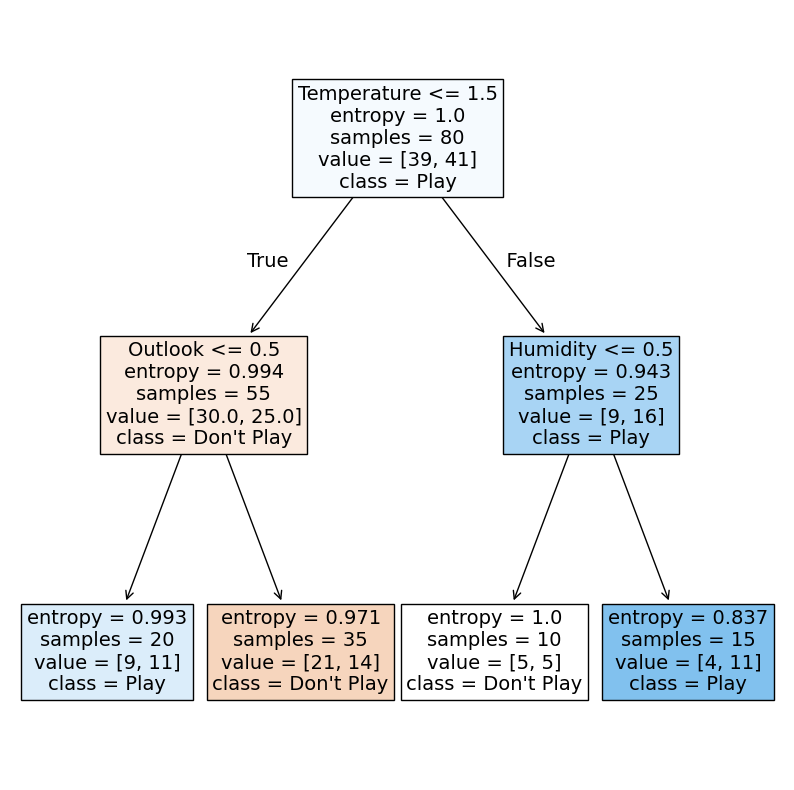

In [17]:
plt.figure(figsize=(10, 10))
plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'],  # Use plot_tree instead of plt_tree
          class_names=['Don\'t Play', 'Play'], filled=True, fontsize=14)
plt.show()

In [18]:
y_pred = clf.predict(X_test)
accauracy=clf.score(X_test,y_pred)
print(f'\n Model Accauracy:{accauracy *100:.2f}%')


 Model Accauracy:100.00%


In [20]:
print("\n Please enter the details of the new sample for classification :")
outlook=int(input("outlook(sunny=2,overcast=0,rain=1)  =  "))
temperature=int(input("temperature(hot=1,mild=2,cool=0)  =  "))
humidity=int(input("humidity(normal=0,high=1)  =  "))
windy=int(input("windy(false=0,true=1)  =  "))
new=[[outlook,temperature,humidity,windy]]
prediction=clf.predict(new)
print("\nPrediction for new data:",'play'if prediction[0]==1 else 'don\'t play')


 Please enter the details of the new sample for classification :
outlook(sunny=2,overcast=0,rain=1)  =  0
temperature(hot=1,mild=2,cool=0)  =  0
humidity(normal=0,high=1)  =  0
windy(false=0,true=1)  =  0

Prediction for new data: play


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **Naive Bayesian**

In [21]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Load text files from the folder and assign category labels
def load_documents(folder_path="/content/datasets/data"): # Modified folder_path
    documents = []
    labels = []
    # Iterate through the folder, assuming folder structure is like
    # →'category1', 'category2', etc.
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path) and category != '.ipynb_checkpoints':
            # Skip .ipynb_checkpoints
            for file_name in os.listdir(category_path):
                file_path = os.path.join(category_path, file_name)
                # Only process text files
                if file_name.endswith('.txt'):
                    with open(file_path, 'r', encoding='utf-8') as file:
                        # Read the document and strip out unnecessary
                        # →whitespaces and newlines
                        content = file.read().strip()
                        documents.append(content)  # Load cleaned document
                        # →content
                        labels.append(category)  # Assign category as the label
    return documents, labels

# Step 2: Define folder path (where your documents are stored)
# folder_path = os.path.join(os.getcwd())  # Use current working directory -- Removed this line
folder_path = "/content/datasets/data" # Updated folder_path

# Load documents and their labels
documents, labels = load_documents(folder_path)

# Step 3: Create a DataFrame with two columns: Content and Category
df = pd.DataFrame({
    'Content': documents,
    'Category': labels
})
print(df)

# Step 4: Apply TF-IDF Vectorization to the document contents
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
X = tfidf_vectorizer.fit_transform(df['Content'])  # Transform text data into TF-IDF features

# Convert the TF-IDF matrix into a DataFrame for easy handling
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Step 5: Add the labels to the TF-IDF DataFrame
tfidf_df['Category'] = labels

                                              Content    Category
0   Drinking water is fundamental to maintaining h...      Health
1   Managing stress is essential for maintaining b...      Health
2   A balanced diet is essential for maintaining o...      Health
3   Regular exercise is a cornerstone of a healthy...      Health
4   Getting enough sleep is crucial for overall he...      Health
5   Python is a versatile and powerful programming...  Technology
6   The Internet of Things (IoT) is a rapidly adva...  Technology
7   Data science is a multidisciplinary field that...  Technology
8   Blockchain is a revolutionary technology that ...  Technology
9   Machine learning is a rapidly evolving field i...  Technology
10  Cricket is a globally popular sport known for ...      Sports
11  Basketball is a fast-paced and highly popular ...      Sports
12  Playing sports is a crucial component of a hea...      Sports
13  Tennis is a widely celebrated sport known for ...      Sports
14  Footba

In [22]:
# Optional: Save the TF-IDF DataFrame to a CSV file
csv_file_path = 'documents_with_tfidf_features.csv'
tfidf_df.to_csv(csv_file_path, index=False)
print(f"CSV file successfully created with TF-IDF features: {csv_file_path}")
print(tfidf_df)


CSV file successfully created with TF-IDF features: documents_with_tfidf_features.csv
     ability  academic    access  accuracy    across  actionable    active  \
0   0.000000  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000    0.000000  0.042925   
3   0.000000  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
4   0.000000  0.032110  0.000000  0.000000  0.000000    0.000000  0.032110   
5   0.000000  0.028808  0.000000  0.000000  0.000000    0.000000  0.000000   
6   0.000000  0.000000  0.020950  0.000000  0.039796    0.020950  0.000000   
7   0.039321  0.000000  0.000000  0.018004  0.015389    0.048607  0.000000   
8   0.000000  0.000000  0.050661  0.000000  0.032078    0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.081491  0.017414    0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.023905  0.020434    

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Load the TF-IDF DataFrame (assuming 'documents_with_tfidf_features.csv' was␣
# →created previously)
df = pd.read_csv('documents_with_tfidf_features.csv')
# Separate features (X) and labels (y)
X = df.drop('Category', axis=1)
y = df['Category']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()
# Fit the model to the training data
nb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00


# **Dimensionality Reduction**

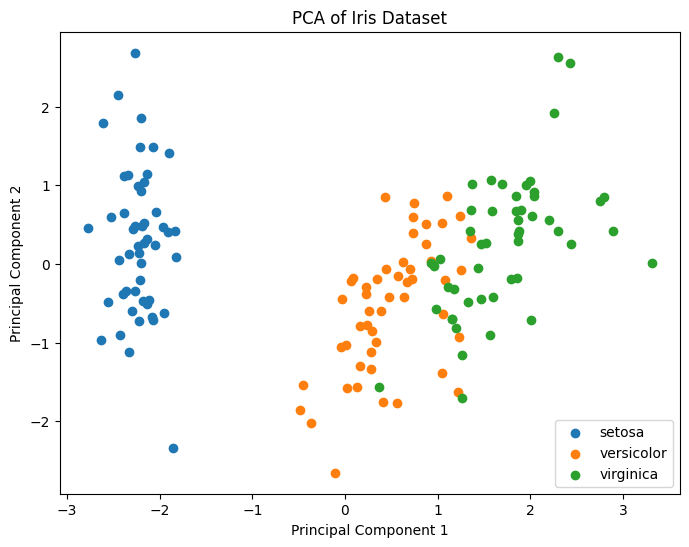

In [24]:
# prompt: principle component analysis for dimensionality reduction using iris datset in a short way

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# Visualize the results
plt.figure(figsize=(8, 6))
for target in range(3):
    subset = pca_df[pca_df['Target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

# **Recommender System**

In [25]:
import pandas as pd
import numpy as np # Corrected the indentation
from sklearn.decomposition import TruncatedSVD
# Step 1: Create a synthetic dataset (User-Item ratings)
data = {
    'User': ['User1', 'User2', 'User3', 'User4', 'User5'],
    'Item1': [5, 3, 4, np.nan, 2],
    'Item2': [3, 2, 4, 4, 5],
    'Item3': [4, 4, 3, 2, np.nan],
    'Item4': [2, 5, 3, 4, 1],
    'Item5': [3, 4, np.nan, 5, 4],
    'Item6': [5, 4, 2, 3, 4],
}
# Create a DataFrame
df = pd.DataFrame(data)
# Step 2: Handle missing values- Fill missing values with 0 (indicating no rating)
df_filled = df.fillna(0) # Define df_filled before using it
# Step 3: Set User column as the index
df_filled.set_index('User', inplace=True) # Now you can use df_filled
# Step 4: Mean center the ratings (subtract user mean)
user_means = df_filled.mean(axis=1)  # Calculate the mean rating for each user
df_centered = df_filled.sub(user_means, axis=0)  # Subtract user mean from each user's ratings
# Step 5: Apply Singular Value Decomposition (SVD) on the centered data
svd = TruncatedSVD(n_components=2)  # Set the number of latent factors (components)
U = svd.fit_transform(df_centered)  # User feature matrix
Sigma = np.diag(svd.singular_values_)  # Singular values (diagonal matrix)
Vt = svd.components_  # Item feature matrix

# Step 6: Reconstruct the matrix using the SVD components
reconstructed_matrix = np.dot(np.dot(U, Sigma), Vt)
# Step 7: Add back the mean ratings to reconstruct the original scale
reconstructed_matrix_with_mean = reconstructed_matrix + user_means.values[:, np.newaxis]
# Create a DataFrame for the reconstructed ratings with the added mean
reconstructed_df = pd.DataFrame(reconstructed_matrix_with_mean, columns=df_filled.columns, index=df_filled.index)
print("\nReconstructed Ratings Matrix (after SVD, with added mean):")
print(reconstructed_df)


Reconstructed Ratings Matrix (after SVD, with added mean):
           Item1      Item2     Item3     Item4      Item5     Item6
User                                                                
User1  10.409302   4.824364  4.726916 -0.086580  -2.096509  4.222507
User2   0.434367  -0.987566  6.725279  8.879981   5.377260  1.570678
User3  11.922851   1.903255  6.169294 -0.526296  -5.848801  2.379697
User4 -10.970898   6.223370 -4.088850  6.094396  16.384490  4.357492
User5  -3.050503  14.720267 -9.574655 -5.007330  10.899138  8.013084


In [26]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min-Max scaling to bring the reconstructed values to the range [1, 5]
scaler = MinMaxScaler(feature_range=(1, 5)) # Removed extra space before this line
reconstructed_df_scaled = pd.DataFrame(scaler.fit_transform(reconstructed_df),
                                       columns=reconstructed_df.columns, index=reconstructed_df.index)
print("\nReconstructed Ratings Matrix (after Min-Max Scaling):")
print(reconstructed_df_scaled)
# Step 6: Recommend items for a user based on predicted ratings
def recommend_items(user, reconstructed_df, n_recommendations=3):
    # Get the user's predicted ratings
    user_ratings = reconstructed_df.loc[user]
    # Sort the ratings in descending order and recommend the top n items
    recommended_items = user_ratings.sort_values(ascending=False).head(n_recommendations) # Fixed line continuation
    return recommended_items
# Step 7: Get recommendations for a specific user (e.g., User1)
user_to_recommend = 'User5'
recommended_items = recommend_items(user_to_recommend, reconstructed_df_scaled)
print(f"\nRecommended items for {user_to_recommend}:")
print(recommended_items)



Reconstructed Ratings Matrix (after Min-Max Scaling):
          Item1     Item2     Item3     Item4     Item5     Item6
User                                                             
User1  4.735552  2.480008  4.509602  2.417337  1.675076  2.646484
User2  2.992730  1.000000  5.000000  5.000000  3.019685  1.000000
User3  5.000000  1.736148  4.863561  2.290684  1.000000  1.502308
User4  1.000000  2.836265  2.346215  4.197660  5.000000  2.730294
User5  2.383853  5.000000  1.000000  1.000000  4.013128  5.000000

Recommended items for User5:
Item2    5.000000
Item6    5.000000
Item5    4.013128
Name: User5, dtype: float64
